In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('train.csv')
import seaborn as sns
print(df.isna().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


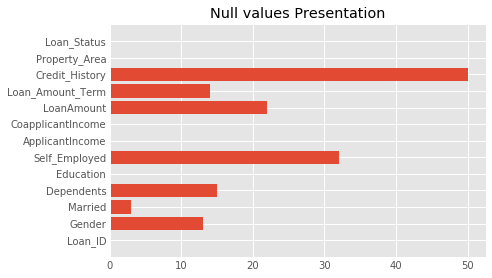

In [2]:
#Plotting Null Values in Columns
Null=[]
for i,j in df.iteritems():
	nul=j.isna().sum()
	#print('Null Values present in',i,'are = ',nul)
	Null.append(nul)
columns=df.columns
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
plt.barh(columns,Null,)
plt.title('Null values Presentation')
plt.show()


In [3]:
#Null Values Handle!!
df['Dependents']=df['Dependents'].fillna(0)
cols=['Gender','Married','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
for col in df:
	if col in cols:
		df[col].fillna(method='ffill',inplace=True)
	elif col in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
		df[col].fillna(df[col].mean(),inplace=True)

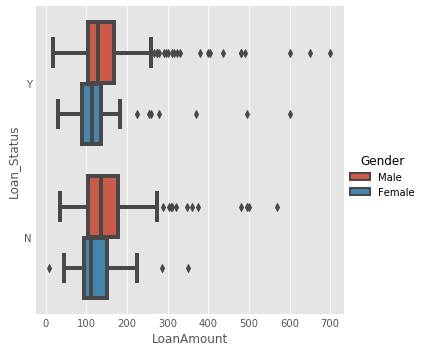

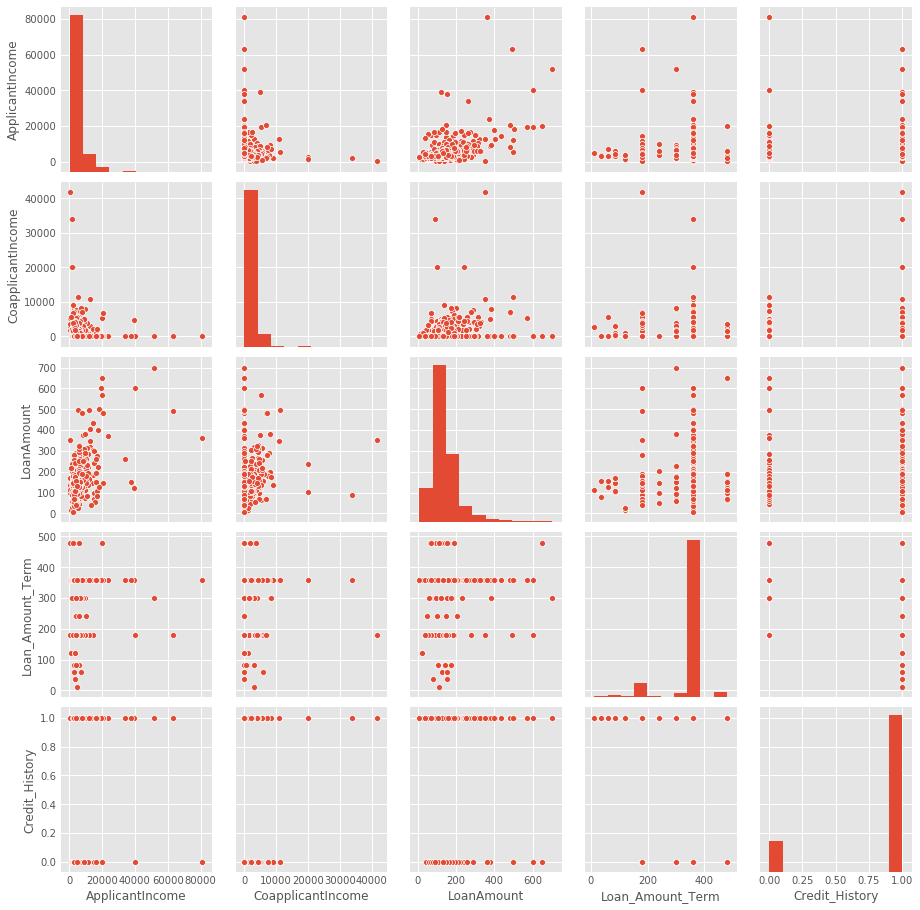

In [5]:
#Male Got More Previleged
sns.catplot(x='LoanAmount',y='Loan_Status',data=df,hue='Gender',kind='box')
sns.pairplot(df)
plt.show()

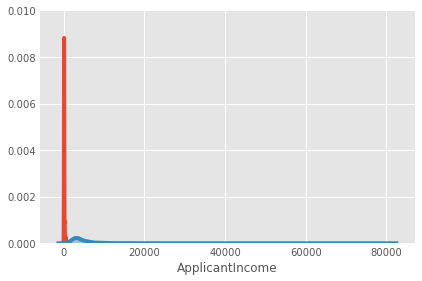

700.0


In [6]:
sns.distplot(df['LoanAmount'])
sns.distplot(df['ApplicantIncome'])
plt.show()
print(df['LoanAmount'].quantile(1))

(614, 13)
146.41216216216216
a: 495.87
(607, 13)


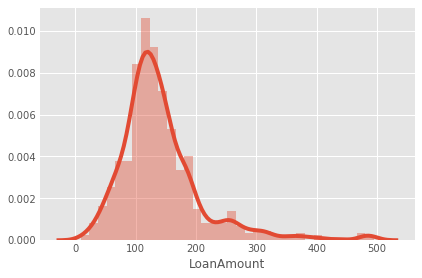

141.31971592679994


In [7]:
print(df.shape)
print(df.LoanAmount.mean())
a=df['LoanAmount'].quantile(0.99)
print('a:',a)
df=df[df['LoanAmount']<a]
print(df.shape)
sns.distplot(df['LoanAmount'])
plt.show()
print(df.LoanAmount.mean())



(607, 13)
5166.802306425041
a: 20823.03999999999
(600, 13)


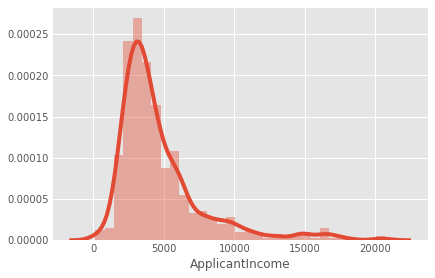

4727.606666666667


In [8]:
print(df.shape)
print(df.ApplicantIncome.mean())
a=df['ApplicantIncome'].quantile(0.99)
print('a:',a)
df=df[df['ApplicantIncome']<a]
print(df.shape)
sns.distplot(df['ApplicantIncome'])
plt.show()
print(df.ApplicantIncome.mean())

(600, 13)
1631.2698666477334
a: 8999.879999999981
(594, 13)


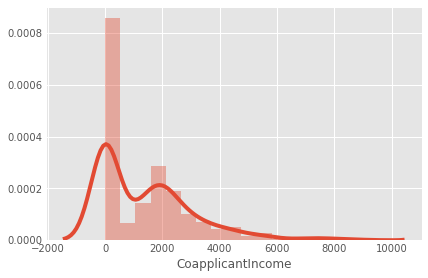

1415.8079461088216
(594, 13)


In [9]:
print(df.shape)
print(df.CoapplicantIncome.mean())
a=df['CoapplicantIncome'].quantile(0.99)
print('a:',a)
df=df[df['CoapplicantIncome']<a]
print(df.shape)
sns.distplot(df['CoapplicantIncome'])
plt.show()
print(df.CoapplicantIncome.mean())
print(df.shape)

In [10]:
#Dummies
df[['Loan_Amount_Term','Credit_History']]=df[['Loan_Amount_Term','Credit_History']].astype(str)
a=pd.get_dummies(df[['Dependents','Gender','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status','Married']],drop_first=True)
#print(a)
#print(a.dtypes)
#print(df)
df.drop(['Gender','Loan_ID','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status'],axis='columns',inplace=True)
df=pd.concat([df,a],axis=1)
print(df)


     ApplicantIncome  CoapplicantIncome  LoanAmount  Dependents_0  \
0               5849                0.0  146.412162             1   
1               4583             1508.0  128.000000             0   
2               3000                0.0   66.000000             1   
3               2583             2358.0  120.000000             1   
4               6000                0.0  141.000000             1   
..               ...                ...         ...           ...   
609             2900                0.0   71.000000             1   
610             4106                0.0   40.000000             0   
611             8072              240.0  253.000000             0   
612             7583                0.0  187.000000             0   
613             4583                0.0  133.000000             1   

     Dependents_1  Dependents_2  Dependents_3+  Gender_Male  \
0               0             0              0            1   
1               1             0              

In [11]:
from sklearn.preprocessing import StandardScaler
df.iloc[:,[0,1,2]]=StandardScaler().fit_transform(df.iloc[:,[0,1,2]].values)


y=df['Loan_Status_Y']
x=df.drop('Loan_Status_Y',axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)






Without Feature Selection 

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

y_prep=classifier.predict(x_test)
#print(y_prep)

from sklearn.metrics import accuracy_score
print('RandomForest:',accuracy_score(y_test,y_prep))


from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)
y_prep=classifier.predict(x_test)
print('DecisionTreeClassifier:',accuracy_score(y_test,y_prep))


from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
y_prep=classifier.predict(x_test)
print('LogisticRegression:',accuracy_score(y_test,y_prep))

from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_prep=classifier.predict(x_test)
print('NaiveBias:',accuracy_score(y_test,y_prep))


from sklearn.neighbors import KNeighborsClassifier
#n_neighbors=5 because we want to take the number of data points that fall near it and and which side the data point is max that will be the result and p=2 bcz we want to take distance as euklean distance.
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_prep=classifier.predict(x_test)
print('KNeighborsClassifier:',accuracy_score(y_test,y_prep))

from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)
y_prep=classifier.predict(x_test)
print('SVC:',accuracy_score(y_test,y_prep))





RandomForest: 0.773109243697479
DecisionTreeClassifier: 0.6722689075630253
LogisticRegression: 0.8067226890756303
NaiveBias: 0.25210084033613445
KNeighborsClassifier: 0.7226890756302521
SVC: 0.8151260504201681


In [ ]:
With Feature Selection

In [13]:
import statsmodels.api as sm
#x=sm.add_constant(x)
regressor=sm.OLS(y,x).fit()
print(regressor.summary())


cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    #print(model.summary())
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.06):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)



x_train=x_train[['CoapplicantIncome','Loan_Amount_Term_36.0','Credit_History_1.0','Property_Area_Semiurban','Married_Yes']]
x_test=x_test[['CoapplicantIncome','Loan_Amount_Term_36.0','Credit_History_1.0','Property_Area_Semiurban','Married_Yes']]




from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

y_prep=classifier.predict(x_test)
#print(y_prep)

from sklearn.metrics import accuracy_score
print('RandomForest:',accuracy_score(y_test,y_prep))


from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)
y_prep=classifier.predict(x_test)
print('DecisionTreeClassifier:',accuracy_score(y_test,y_prep))


from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
y_prep=classifier.predict(x_test)
print('LogisticRegression:',accuracy_score(y_test,y_prep))

from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_prep=classifier.predict(x_test)
print('NaiveBias:',accuracy_score(y_test,y_prep))


from sklearn.neighbors import KNeighborsClassifier
#n_neighbors=5 because we want to take the number of data points that fall near it and and which side the data point is max that will be the result and p=2 bcz we want to take distance as euklean distance.
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_prep=classifier.predict(x_test)
print('KNeighborsClassifier:',accuracy_score(y_test,y_prep))

from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)
y_prep=classifier.predict(x_test)
print('SVC:',accuracy_score(y_test,y_prep))




                                 OLS Regression Results                                
Dep. Variable:          Loan_Status_Y   R-squared (uncentered):                   0.469
Model:                            OLS   Adj. R-squared (uncentered):              0.447
Method:                 Least Squares   F-statistic:                              21.90
Date:                Sat, 11 Apr 2020   Prob (F-statistic):                    9.01e-64
Time:                        23:40:07   Log-Likelihood:                         -256.03
No. Observations:                 594   AIC:                                      558.1
Df Residuals:                     571   BIC:                                      659.0
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------